# I. Подготовка данных и базовые операции с NumPy


## Загрузка и подготовка данных

In [ ]:
!gdown --id 1e6hzCsUz73wogcnMMQ1SemGLL4vv83Kk -O dataset.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1e6hzCsUz73wogcnMMQ1SemGLL4vv83Kk
To: /content/dataset.csv
100% 497k/497k [00:00<00:00, 60.5MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/dataset.csv')

In [ ]:
df

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003
7256,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764
7257,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694
7258,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                7260 non-null   int64  
 1   Date              7260 non-null   object 
 2   Hour              7260 non-null   int64  
 3   Temperature       7260 non-null   float64
 4   Humidity          7260 non-null   int64  
 5   Wind_Speed        7260 non-null   float64
 6   Visibility        7260 non-null   int64  
 7   Dew_Point         7260 non-null   float64
 8   Solar_Radiation   7260 non-null   float64
 9   Rainfall          7260 non-null   float64
 10  Snowfall          7260 non-null   float64
 11  Season            7260 non-null   object 
 12  IsHoliday         7260 non-null   int64  
 13  IsFunctioningDay  7260 non-null   int64  
 14  Bikes_Rented      7260 non-null   int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 850.9+ KB


Как мы видим, у нас нет пропусков и только 1 категориальная переменная - Season. Преобразуем ее в числовой признак с помощью OneHotEncoder



In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Season']])

season_enc = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
df.drop(columns=['Season'], inplace=True)

df = pd.concat([df, season_enc], axis=1)

In [ ]:
df.describe()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,IsHoliday,IsFunctioningDay,Bikes_Rented,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
count,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000
mean,4362.661295,11.497658,12.838871,58.258127,1.720441,1439.033333,4.048223,0.568001,0.150510,0.074050,0.050275,0.967355,703.427548,0.247934,0.250413,0.251102,0.250551
std,2531.561970,6.933540,12.043146,20.358714,1.039105,606.862754,13.141417,0.866972,1.169305,0.426481,0.218528,0.177717,645.327438,0.431843,0.433281,0.433677,0.433360
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2155.750000,5.000000,3.200000,42.000000,0.900000,941.750000,-4.725000,0.000000,0.000000,0.000000,0.000000,1.000000,190.000000,0.000000,0.000000,0.000000,0.000000
50%,4358.500000,11.000000,13.700000,57.000000,1.500000,1699.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,499.000000,0.000000,0.000000,0.000000,0.000000
75%,6559.250000,18.000000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,1066.000000,0.000000,1.000000,1.000000,1.000000
max,8759.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,3556.000000,1.000000,1.000000,1.000000,1.000000


Как видно по данным, нужно сделать нормализацию или стандартизацию. Но, как я понял из описания лабы, нормализацию нужно оформить в виде собственной функции в следующих блоках, поэтому не будем торопиться.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_norm = df.copy()
columns = ["Temperature", "Humidity", "Wind_Speed", "Visibility",
                        "Dew_Point", "Solar_Radiation", "Rainfall", "Snowfall", "Bikes_Rented"]
df_norm[columns] = scaler.fit_transform(df[columns])

df_norm.head()

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,IsHoliday,IsFunctioningDay,Bikes_Rented,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,0,01/12/2017,0,-1.497957,-1.044250,0.461544,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,0,1,-0.696481,0.0,0.0,0.0,1.0
1,1,01/12/2017,1,-1.522869,-0.995128,-0.885863,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,0,1,-0.773967,0.0,0.0,0.0,1.0
2,2,01/12/2017,2,-1.564389,-0.946005,-0.693376,0.924435,-1.655051,-0.655201,-0.128726,-0.173641,0,1,-0.822008,0.0,0.0,0.0,1.0
3,3,01/12/2017,3,-1.580997,-0.896883,-0.789619,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,0,1,-0.924288,0.0,0.0,0.0,1.0
4,4,01/12/2017,4,-1.564389,-1.093373,0.557787,0.924435,-1.723542,-0.655201,-0.128726,-0.173641,0,1,-0.969230,0.0,0.0,0.0,1.0


##  Основные операции с NumPy

In [ ]:
import numpy as np

In [ ]:
df.columns

Index(['Id', 'Date', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_Point', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'IsHoliday', 'IsFunctioningDay', 'Bikes_Rented', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [ ]:
hours = np.array(df['Hour'])
hours

array([ 0,  1,  2, ..., 21, 22, 23])

In [ ]:
temperature = np.array(df['Temperature'])
humidity = np.array(df['Humidity'])
windspeed = np.array(df['Wind_Speed'])
visibility = np.array(df['Visibility'])
dew_point_temperature = np.array(df['Dew_Point'])
solar_radiation = np.array(df['Solar_Radiation'])
rainfall = np.array(df['Rainfall'])
snowfall = np.array(df['Snowfall'])
isholiday = np.array(df['IsHoliday'])
iffunctioningday = np.array(df['IsFunctioningDay'])
season_autumn = np.array(df['Season_Autumn'])
season_spring = np.array(df['Season_Spring'])
season_summer = np.array(df['Season_Summer'])
season_winter = np.array(df['Season_Winter'])
rented_bike_count = np.array(df['Bikes_Rented'])


## Индексация и срезы

In [ ]:
mat = np.matrix([season_autumn, season_spring])
mat.T

matrix([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [ ]:
import typing as tp

In [ ]:
from datetime import datetime

def get_data_for_dates(date_input: str) -> tp.Optional[np.matrix]:
  """Функция, возвращающая данные, соотв. дате или диапазону дат"""
  if not date_input or not all(c in '0123456789.-' for c in date_input):
    print('Incorrect date format')
    return None

  # Преобразуем столбец 'Date' в datetime
  df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y", errors="coerce")

  try:
    # Диапазон дат
    if '-' in date_input:
      start_date, end_date = date_input.split('-')

      # Преобразуем даты, чтобы их можно было использовать по формату
      if len(start_date.split('.')) == 1:
        start_date = '01.01.' + start_date
      elif len(start_date.split('.')) == 2:
        start_date = '01.' + start_date

      if len(end_date.split('.')) == 1:
        end_date = '01.01.' + end_date
      elif len(end_date.split('.')) == 2:
        end_date = '01.' + end_date

      start_date = pd.to_datetime(start_date.strip(), format="%d.%m.%Y", errors="coerce")
      end_date = pd.to_datetime(end_date.strip(), format="%d.%m.%Y", errors="coerce")
      filtered_data = df[df['Date'].between(start_date, end_date)]
    else:
      # Если одиночная дата (год, месяц.год, день.месяц.год)

      date_parts = date_input.split('.')

      if len(date_parts) == 1:  # Формат "YYYY"
        filtered_data = df[df['Date'].dt.year == int(date_parts[0])]

      elif len(date_parts) == 2:  # Формат "MM.YYYY"
        filtered_data = df[
            (df['Date'].dt.year == int(date_parts[1])) &
            (df['Date'].dt.month == int(date_parts[0]))
        ]

      elif len(date_parts) == 3:  # Формат "DD.MM.YYYY"
        exact_date = pd.to_datetime(date_input, format="%d.%m.%Y", errors="coerce")
        filtered_data = df[df['Date'] == exact_date]

      else:
        print("Incorrect date format")
        return None

  except ValueError:
    print("Incorrect date format")
    return None

  if filtered_data.empty:
    print("No data found for given date range")
    return None

  return np.asmatrix(filtered_data.values)


In [ ]:
month_data = get_data_for_dates('12.2017')
day_data = get_data_for_dates('17.12.2017')
year_data = get_data_for_dates('2017')

In [ ]:
diapason = get_data_for_dates('2017-08.04.2018')

In [ ]:
diapason

matrix([[0, Timestamp('2017-12-01 00:00:00'), 0, ..., 0.0, 0.0, 1.0],
        [1, Timestamp('2017-12-01 00:00:00'), 1, ..., 0.0, 0.0, 1.0],
        [2, Timestamp('2017-12-01 00:00:00'), 2, ..., 0.0, 0.0, 1.0],
        ...,
        [3093, Timestamp('2018-04-08 00:00:00'), 21, ..., 1.0, 0.0, 0.0],
        [3094, Timestamp('2018-04-08 00:00:00'), 22, ..., 1.0, 0.0, 0.0],
        [3095, Timestamp('2018-04-08 00:00:00'), 23, ..., 1.0, 0.0, 0.0]],
       dtype=object)

In [ ]:
display(day_data, month_data, year_data)

# II. Операции с векторами и матрицами

## Операции над векторами

In [ ]:
vec1 = np.random.randint(0, 10, 5)
vec2 = np.random.randint(0, 10, 5)

In [ ]:
print(vec1)
print(vec2)

[8 3 6 0 7]
[0 5 4 9 6]


In [ ]:
resulting_sum = vec1 + vec2
resulting_sum

array([ 8,  8, 10,  9, 13])

In [ ]:
resulting_dif = vec1 - vec2
resulting_dif

array([ 8, -2,  2, -9,  1])

In [ ]:
scalar = 3
vec3 = scalar * vec1
vec3

array([24,  9, 18,  0, 21])

In [ ]:
vec3 = vec1**2
print(vec1, vec3)

[8 3 6 0 7] [64  9 36  0 49]


Протестируем broadcasting

In [ ]:
vec1 = np.array([1,3,0]) # размеры (0,3)
vec2 = np.array([[10], [0], [20]]) # размер (3,1)
print(vec1.shape, vec2.shape)
print(vec1)
print(vec2)

(3,) (3, 1)
[1 3 0]
[[10]
 [ 0]
 [20]]


Тут мы променим Broadcasting для двух векторов разных размеров. Складывание (1,3) и (3,1) вектора дает (3,3) матриц, столбцы которой представляют собой vec2.T + соответствующие элементы вектора vec1

In [ ]:
vec_broad = vec1 + vec2
vec_broad

array([[11, 13, 10],
       [ 1,  3,  0],
       [21, 23, 20]])

Сложим матрицу (2,3) и вектор (1,3) и получим матрицу, строки которой представляют собой сумму соответсвующей строки из matrix и vector. Строки матрицы должны иметь столько же элементов, сколько и вектор

In [ ]:
matrix = np.matrix([[1,2,0], [8,2,9]])
vector = np.array([10,20,30])

In [ ]:
matrix_broad = matrix + vector
matrix_broad

matrix([[11, 22, 30],
        [18, 22, 39]])

## Скалярное произведение

Напишем функцию для получения косинуса угла между двумя векторами

In [ ]:
def get_cos(vec1: np.array, vec2: np.array):
  """Функция для вычисления косинуса через теорему косинусов"""
  dist = np.sqrt(np.sum((vec1 - vec2) ** 2))
  norm_1 = np.sqrt(np.sum(vec1 ** 2))
  norm_2 = np.sqrt(np.sum(vec2 ** 2))
  try:
    return (dist**2 - norm_1**2 - norm_2**2) / -(2 * norm_1 * norm_2)
  except ZeroDivisionError:
    print("0 vector can't be scalar multiplied with another vector")
    return None

In [ ]:
vec1 = np.array([1,1,1])
vec2 = np.array([1,0,0])
cos = get_cos(vec1, vec2)
print(cos)

0.5773502691896255


А теперь для скалярного произведения

In [ ]:
def get_scalar_prod(vec1: np.array, vec2: np.array):
  """Функция для нахождения скалярного произведения двух векторов"""
  cos = get_cos(vec1, vec2)
  return np.linalg.norm(vec1) * np.linalg.norm(vec2) * cos

In [ ]:
scalar_prod = get_scalar_prod(vec1, vec2)
scalar_dot = np.dot(vec1, vec2)

print(scalar_prod, scalar_dot)

0.9999999999999994 1


Значения отличаются на несущественную часть, которая возникает из-за погрешности точных вычислений в обычном python и numpy

Далее можно наглядно посмотреть, как скалярное произведение показывает схожесть и различие в данных

In [ ]:
np.set_printoptions(suppress=True, precision=16)

In [ ]:
# Оба признака, как это и предпологается, сильно коррелируют друг с другом
get_scalar_prod(temperature, rented_bike_count)

96184387.39999917

In [ ]:
# А здесь наоборот
print(f'{get_scalar_prod(season_summer, snowfall):.20f}')

0.00000000000022737368


In [ ]:
get_scalar_prod(humidity, rented_bike_count)

278787056.0

# III. Анализ сходства между векторами

## Корреляция и косинусное сходство

Посмотрим на корреляцию двух векторов. Рассчитаем коэффициент Пирсона, который равен
$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \cdot \sqrt{\sum (y_i - \bar{y})^2}} = \frac{\operatorname{cov}(X,Y)}{\sigma_X \cdot \sigma_Y}$


In [ ]:
def find_pirson_coeff(X: np.array, Y: np.array) -> tp.Optional[float]:
  """Функция для нахождения коэффициента корреляции Пирсона"""
  if len(X) != len(Y):
    print('Please, input vectors with same shapes')
    return None
  mean_X, mean_Y = X.mean(), Y.mean()

  std_X = np.sqrt(sum((X - mean_X)**2) / len(X))
  std_Y = np.sqrt(sum((Y - mean_Y)**2) / len(Y))

  covariation = np.dot(X - mean_X, Y - mean_Y) / len(X)
  return covariation / (std_X * std_Y)

In [ ]:
find_pirson_coeff(humidity, temperature)

0.15965936615413276

In [ ]:
np.corrcoef(humidity, temperature)[0][1]

0.15965936615413082

Рассчитаем косинусное сходство. У меня уже есть функция для нахождения косинуса между двумя векторами. Воспользуемся ей

In [ ]:
get_cos(temperature, season_summer)

0.7595681868810653

Выразим косинус из формулы скалярного произведения

In [ ]:
cos = np.dot(temperature, season_summer) / \
 (np.linalg.norm(temperature) * np.linalg.norm(season_summer))
print(cos)

0.7595681868810689


## Нормализация векторов

Сделаем функцию для нормализации векторов

In [ ]:
def normalize(vector: np.array):
  """Приводим вектор к единичной норме"""
  return vector / np.linalg.norm(vector)

In [ ]:
vector = np.array([100,19,993,57])
normalized_vector = normalize(vector)
print(normalized_vector)
np.linalg.norm(normalized_vector)

[0.100017054361777  0.0190032403287376 0.9931693498124455
 0.0570097209862129]


1.0

## Поиск сходства

In [ ]:
def get_similar(query: np.array, data: np.ndarray, k: int =5) -> list:
  """Вычисляем схожесть каждого вектора из data с query"""

  similarity_list: list[tuple[float, int]] = []
  # Будем брать векторы со третьего элемента, так как первые два - id и Date
  for i in range(len(data)):
    # Метод .A1 преобразует матрицу (1,n) в (n,)
    cos_sim = get_cos(query[0, 2:].A1, data[i, 2:].A1)
    similarity_list.append((cos_sim, data[i][0, 0]))

  similarity_list.sort(key=lambda x: -x[0])
  return [id for _,id in similarity_list[:k]]

In [ ]:
day = get_data_for_dates('24.06.2018')
month = get_data_for_dates('06.2018')

print(get_similar(day, month, k=10))

[4920, 5049, 4561, 4763, 4833, 5067, 4855, 5075, 5081, 5007]


# IV. Прогнозирование и кластеризация


## Фильтрация временных рядов

Выполним фильтрацию данных. Применим скользящее среднее



In [ ]:
def apply_filter(data: np.array, kernel: np.array) -> np.ndarray:
  """Функция для сглаживания данных"""
  result = np.zeros(len(data))
  kernel_size = len(kernel)
  # Добавим элементов, чтобы при проходе мы не выходили за пределы массива
  padded_data = np.pad(data, (kernel_size, 0), mode='edge')

  # Проходим окном и сглаживаем данные
  for i in range(len(data)):
    result[i] = np.dot(padded_data[i:i+kernel_size], kernel)
  return result

У нас слишком много данных. Объединим их в недели для удобства.

In [ ]:
weekly_rented_bikes = []
for i in range(0, len(df)-24*7, 24*7):
  weekly_rented_bikes.append(sum(df.loc[i:i+24*7, 'Bikes_Rented']))

weekly_rented_bikes = np.array(weekly_rented_bikes)

Теперь сгладим данные

In [ ]:
k = 3
kernel = np.array([1/k for i in range(k)])
smoothed_weekly_rented_bikes = apply_filter(weekly_rented_bikes, kernel)

In [ ]:
k2 = 6
kernel2 = np.array([1/k2 for i in range(k2)])
smoothed_weekly_rented_bikes2 = apply_filter(weekly_rented_bikes, kernel2)

Отрисуем данные

In [ ]:
import matplotlib.pyplot as plt

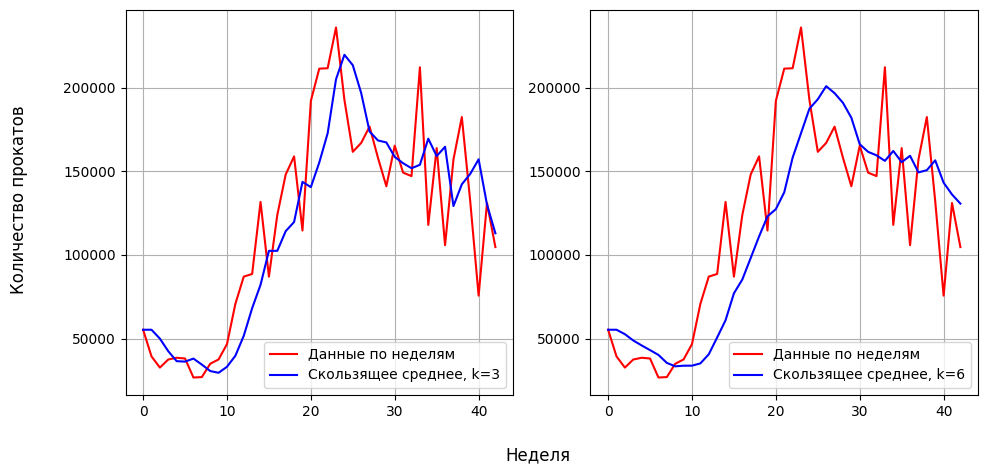

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(11,5))

ax0.plot(np.arange(0, len(weekly_rented_bikes)), weekly_rented_bikes,
         label='Данные по неделям', color='red')
ax0.plot(np.arange(0, len(weekly_rented_bikes)), smoothed_weekly_rented_bikes,
         label=f'Скользящее среднее, k={k}', color='blue')

ax1.plot(np.arange(0, len(weekly_rented_bikes)), weekly_rented_bikes,
         label='Данные по неделям', color='red')
ax1.plot(np.arange(0, len(weekly_rented_bikes)), smoothed_weekly_rented_bikes2,
         label=f'Скользящее среднее, k={k2}', color='blue')

ax0.legend()
ax0.grid()
ax1.legend()
ax1.grid()

fig.text(0.5, -0.02, "Неделя", ha='center', fontsize=12)
fig.text(0.02, 0.5, "Количество прокатов", va='center', rotation='vertical', fontsize=12)
plt.show()

Можно использовать различные виды ядер. К примеру, Гауссово ядро:

In [ ]:
def gaussian_kernel(size, sigma=1):
  """Функция для нахождения Гауссова ядра для сглаживания"""
  x = np.arange(-size // 2 + 1, size // 2 + 1)
  kernel = np.exp(-x**2 / (2 * sigma**2))
  return kernel / kernel.sum()

In [ ]:
gauss_kernel = gaussian_kernel(5, 1)
smoothed_weekly_rented_bikes_gauss = apply_filter(
    weekly_rented_bikes, gauss_kernel)

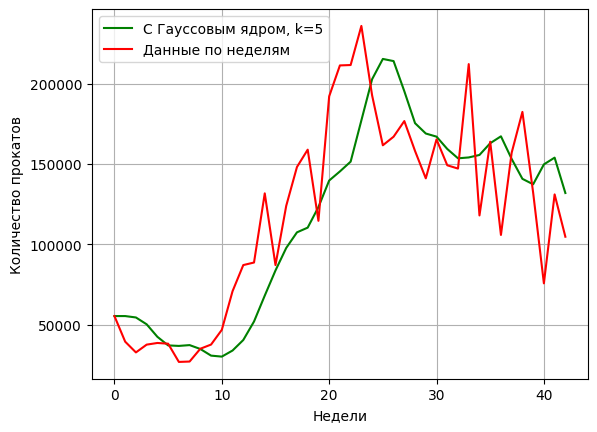

In [ ]:
plt.plot(
    np.arange(0, len(smoothed_weekly_rented_bikes_gauss)),
    smoothed_weekly_rented_bikes_gauss,
    label=f'С Гауссовым ядром, k={len(gauss_kernel)}',
    color='green')
plt.plot(
    np.arange(0, len(weekly_rented_bikes)),
    weekly_rented_bikes,
    label='Данные по неделям',
    color='red')

plt.grid()
plt.xlabel('Недели')
plt.ylabel('Количество прокатов')
plt.legend()
plt.show()

## Кластеризация методом k-средних

Напишем k-means для кластеризации по всем признакам и применим метод "локтя" для определения лучшего числа классов

In [ ]:
def k_means(data: np.ndarray, k=5, max_iters=50, accur=0.0001):
  """Функция для кластеризации данных на k кластеров методом k-means"""
  # Для воспроизводимости
  np.random.seed(0)

  indexes = np.random.choice(len(data), k)
  centroids = data[indexes]
  labels = []

  for _ in range(max_iters):
    old_centroids = centroids.copy()
    labels = np.zeros(len(data))

    # Посчитаем расстояния от точек до центроид и присвоим ближайший класс
    for i in range(len(data)):
      distances = np.linalg.norm(data[i] - centroids, axis=1)
      labels[i] = np.argmin(distances)

    # Обновим центроиды
    for j in range(k):
      # [labels == j] найдет все индексы, где labels == j
      points_for_claster = data[labels == j]
      centroids[j] = np.mean(points_for_claster, axis=0)

    # Проверим, меняются ли центроиды достаточно, чтобы имело смысл продолжать
    now_accur = np.linalg.norm(centroids - old_centroids)
    if now_accur < accur:
      break

  return labels, centroids

In [ ]:
def plot_elbow_method(data: np.ndarray, max_k=10):
  """Функция для отрисовки метода локтя для лучшего подбора кол-ва кластеров"""
  errors = []

  for k in range(1, max_k+1):
    labels, centroids = k_means(data, k=k)

    error = 0
    for i in range(k):
      data_for_claster = data[labels == i]
      error += np.sum((data_for_claster - centroids[i])**2)
    errors.append(error)

  plt.plot(np.arange(1, max_k+1), errors)
  plt.title('Изменение ошибки при изменении кол-ва классов')
  plt.xlabel('Количество кластеров')
  plt.ylabel('Ошибка')
  plt.grid()
  plt.show()

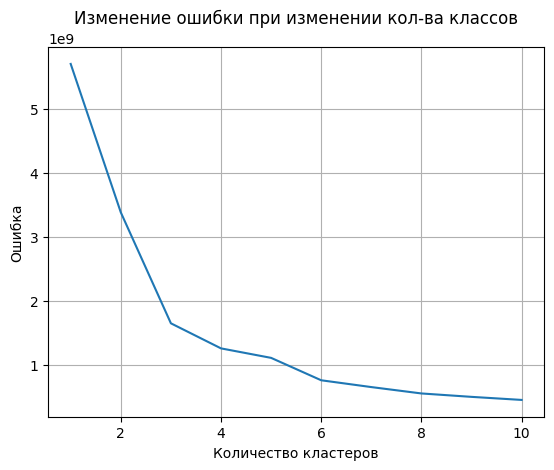

In [ ]:
data_drop = df.drop(columns=['Id','Date','Hour']).to_numpy()
plot_elbow_method(data_drop, max_k=10)

# Генерация случайных данных и анализ


## Генерация случайных данных

Посмотрим на данные

In [ ]:
df.describe()

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,IsHoliday,IsFunctioningDay,Bikes_Rented,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
count,7260.000000,7260,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000
mean,4362.661295,2018-05-31 07:09:49.090909184,11.497658,12.838871,58.258127,1.720441,1439.033333,4.048223,0.568001,0.150510,0.074050,0.050275,0.967355,703.427548,0.247934,0.250413,0.251102,0.250551
min,0.000000,2017-12-01 00:00:00,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2155.750000,2018-02-28 00:00:00,5.000000,3.200000,42.000000,0.900000,941.750000,-4.725000,0.000000,0.000000,0.000000,0.000000,1.000000,190.000000,0.000000,0.000000,0.000000,0.000000
50%,4358.500000,2018-05-31 00:00:00,11.000000,13.700000,57.000000,1.500000,1699.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,499.000000,0.000000,0.000000,0.000000,0.000000
75%,6559.250000,2018-08-31 00:00:00,18.000000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,1066.000000,0.000000,1.000000,1.000000,1.000000
max,8759.000000,2018-11-30 00:00:00,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,3556.000000,1.000000,1.000000,1.000000,1.000000
std,2531.561970,NaN,6.933540,12.043146,20.358714,1.039105,606.862754,13.141417,0.866972,1.169305,0.426481,0.218528,0.177717,645.327438,0.431843,0.433281,0.433677,0.433360


In [ ]:
num_samples = 1000

ids = np.arange(num_samples)
date_range = pd.date_range(start="2017-12-01", periods=365, freq="D")
dates = np.random.choice(date_range, size=num_samples)
hours = np.random.randint(0, 24, size=num_samples)

temperature = np.random.uniform(-17.8, 39.4, num_samples)
humidity = np.random.uniform(0, 98, num_samples)
wind_speed = np.random.uniform(0, 7.4, num_samples)
visibility = np.random.uniform(27, 2000, num_samples)
dew_point = np.random.uniform(-30.6, 27.2, num_samples)
solar_radiation = np.random.uniform(0, 3.52, num_samples)

is_holiday = np.random.choice([0, 1], size=num_samples, p=[0.95, 0.05])
is_functioning_day = 1 - is_holiday

seasons = np.random.choice([0, 1, 2, 3], size=num_samples)
season_autumn = (seasons == 0).astype(int)
season_spring = (seasons == 1).astype(int)
season_summer = (seasons == 2).astype(int)
season_winter = (seasons == 3).astype(int)

rainfall = np.random.uniform(0, 35, num_samples)
snowfall = np.random.uniform(0, 8.8, num_samples)

bikes_rented = np.random.randint(0, 3566, num_samples)

gen_df = pd.DataFrame({
    'Id': ids,
    'Date': dates,
    'Hour': hours,
    'Temperature': temperature,
    'Humidity': humidity,
    'Wind_Speed': wind_speed,
    'Visibility': visibility,
    'Dew_Point': dew_point,
    'Solar_Radiation': solar_radiation,
    'Rainfall': rainfall,
    'Snowfall': snowfall,
    'IsHoliday': is_holiday,
    'IsFunctioningDay': is_functioning_day,
    'Bikes_Rented': bikes_rented,
    'Season_Autumn': season_autumn,
    'Season_Spring': season_spring,
    'Season_Summer': season_summer,
    'Season_Winter': season_winter
})

gen_df = gen_df.to_numpy()

Проверим схожесть, скалярное произведение и корреляцию сгенерированных данных и исходных на случайных векторах

In [ ]:
gen_vec = gen_df[np.random.randint(0,1000)][2:]
vec = df.to_numpy()[np.random.randint(0, df.shape[0])][2:]
print(gen_vec)
print(vec)

[4 -9.678373605674913 96.68898749068215 7.193642829839191 562.208620387857
 -4.739454472502317 2.224663981236039 19.206321526081215
 4.4981933325667525 0 1 908 0 0 1 0]
[0 -6.5 41 1.7 2000 -17.6 0.0 0.0 0.0 0 1 164 0.0 0.0 0.0 1.0]


In [ ]:
print(f'Косинус угла: {get_cos(gen_vec, vec)}')
print(f'Скалярное произведение: {get_scalar_prod(gen_vec, vec)}')
print(f'Коэффициент Пирсона: {find_pirson_coeff(gen_vec, vec)}')

Косинус угла: 0.5933514260101955
Скалярное произведение: 1277453.0422827955
Коэффициент Пирсона: 0.5510394679158791


А теперь для векторов из df

In [ ]:
vec1 = df.to_numpy()[np.random.randint(0, df.shape[0])][2:]
print(f'Косинус угла: {get_cos(vec1, vec)}')
print(f'Скалярное произведение: {get_scalar_prod(vec1, vec)}')
print(f'Коэффициент Пирсона: {find_pirson_coeff(vec1, vec)}')

Косинус угла: 0.9221046548066433
Скалярное произведение: 4077922.0999999996
Коэффициент Пирсона: 0.9170623883031197


# VI. Визуализация результатов

# Визуализация данных

Изобразим зависимость проката велосипедов от температуры

In [ ]:
mean_bikes_rented_per_temp = df.groupby("Temperature")["Bikes_Rented"].mean()
temperature_1 = mean_bikes_rented_per_temp.index

In [ ]:
smoothed_mean_bikes_rented_per_temp = apply_filter(
    mean_bikes_rented_per_temp,
    kernel=[1/7 for i in range(7)])
gaussian_mean_bikes_rented_per_temp = apply_filter(
    mean_bikes_rented_per_temp,
    kernel=gaussian_kernel(5))

[]

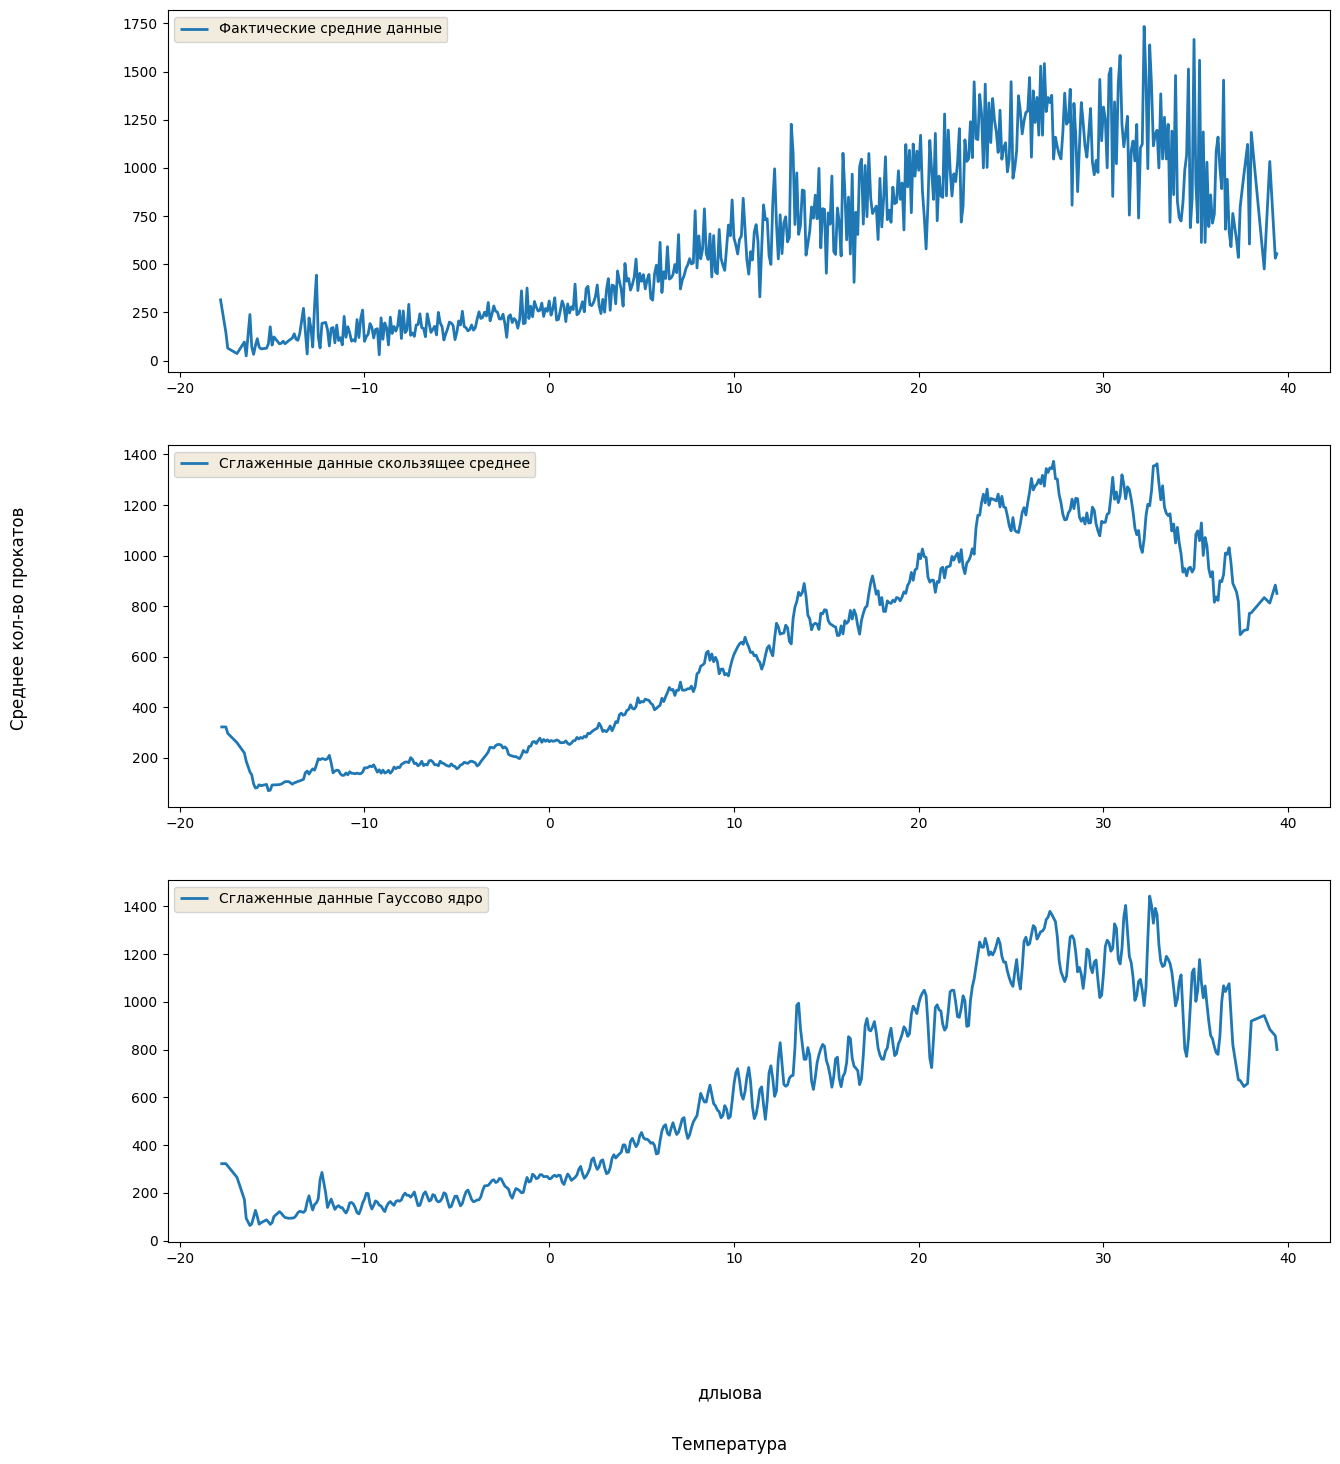

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(15,16))

plt.style.use('Solarize_Light2')

ax0.plot(temperature_1, mean_bikes_rented_per_temp,
            label='Фактические средние данные')
ax1.plot(temperature_1, smoothed_mean_bikes_rented_per_temp,
         label='Сглаженные данные скользящее среднее')
ax2.plot(temperature_1, gaussian_mean_bikes_rented_per_temp,
         label='Сглаженные данные Гауссово ядро')

fig.text(0.5, -0.02, "Температура", ha='center', fontsize=12)
fig.text(0.02, 0.5, "Среднее кол-во прокатов", va='center', rotation='vertical', fontsize=12)
fig.supxlabel('длыова')
ax0.legend()
ax1.legend()
ax2.legend()
plt.plot()

Сделаем генерацию данных случайной

In [ ]:
import random
random.seed(a=None)

def plot_clusters_2D(data: np.ndarray, labels: list[int], features: list[str]):
    fig, ax = plt.subplots(3, 1, figsize=(14,19))

    for i in range(3):
        first_feature, second_feature = np.random.choice(data.shape[1], 2)

        scatter = ax[i].scatter(data[:, first_feature], data[:, second_feature],
                                c=labels, alpha=0.7)
        fig.colorbar(scatter, ax=ax[i], label='Кластер')

        ax[i].set_xlabel(features[first_feature])
        ax[i].set_ylabel(features[second_feature])
        ax[i].set_title(
            f'Кластеры по {features[first_feature]} и {features[second_feature]}')

    plt.show()

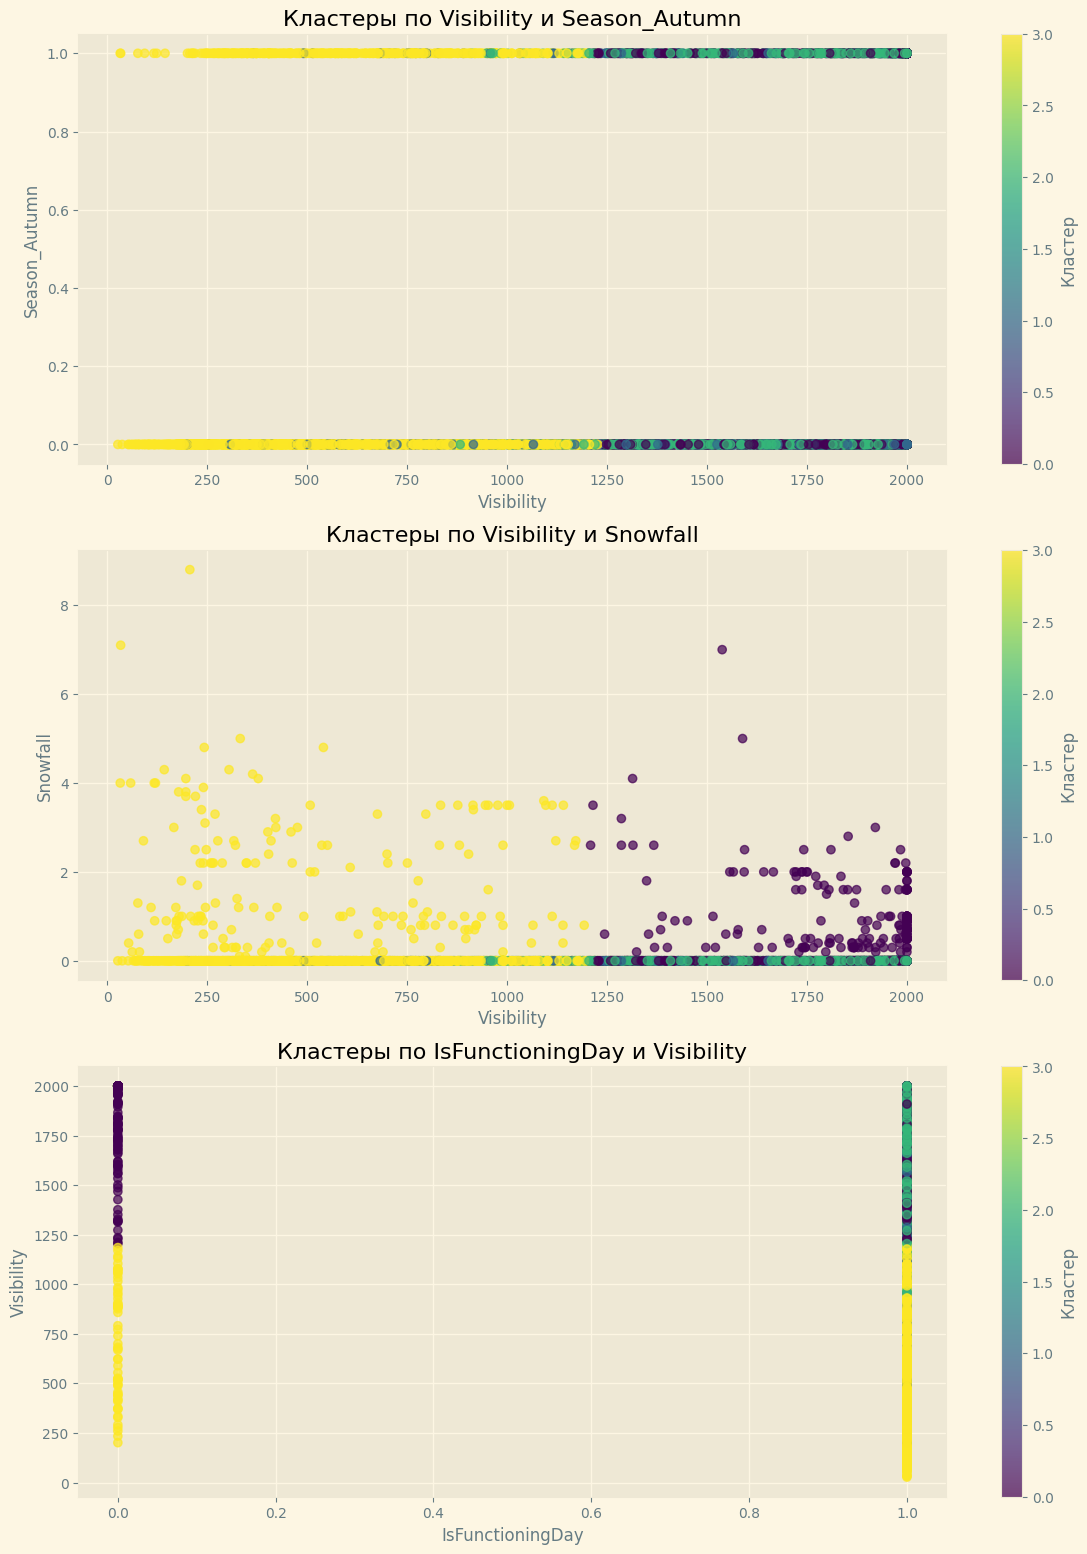

In [ ]:
data_drop = df.drop(columns=['Id','Date','Hour']).to_numpy()
labels, _ = k_means(data_drop, k=4)
plot_clusters_2D(data_drop, labels, df.drop(columns=['Id','Date','Hour']).columns)